## Apply NLP for Similar Analysis of Movie Plots (Text)
This project is for Natural Language Processing fundamentals and Unsupervised clustering in Python.

In [2]:
import numpy as np
import pandas as pd
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
import nltk
import re

np.random.seed(1)
movies_raw = pd.read_csv('datasets/wiki_movie_plots_deduped.csv')
print(movies_raw.columns)

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')


In [3]:
# Data Filter (we only consider drama/American/>2015)
movies = movies_raw[((movies_raw['Genre'] == 'comedy') & 
         (movies_raw['Origin/Ethnicity'] == 'American') &
         (movies_raw['Release Year'] > 2015))].reset_index()
print(movies.shape)

(30, 9)


In [4]:
# Data cleaning of the movies ('Plot')
def cleaning(text):
    text = text.lower()
    text = text.strip(' ')
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)    
    return text

In [5]:
movies['Clean_Plot'] = movies['Plot'].apply(cleaning)
new_movies = movies[['Release Year', 'Title', 'Plot','Clean_Plot']]
display(new_movies.head(5))

,Release Year,Title,Plot,Clean_Plot
0,2016,Dirty Grandpa,Jason Kelly is a lawyer who works for his fath...,jason kelly is a lawyer who works for his fath...
1,2016,"Hail, Caesar!","In 1951, Eddie Mannix (Josh Brolin) is the hea...","in 1951, eddie mannix (josh brolin) is the hea..."
2,2016,Zoolander 2,"At Fashion Interpol, Valentina Valencia examin...","at fashion interpol, valentina valencia examin..."
3,2016,The Bronze,Former gymnastics Bronze Medalist Hope Ann Gre...,former gymnastics bronze medalist hope ann gre...
4,2016,Meet the Blacks,Carl Black and his family are getting out of C...,carl black and his family are getting out of c...


In [6]:
# Both Stem and tokenize
def tokenize_and_stem(text):
    stemmer = SnowballStemmer('english')
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]   
    stems = [stemmer.stem(t) for t in filtered_tokens]    
    return stems

test = new_movies['Clean_Plot'][4]
words_stemmed = tokenize_and_stem(test)
print(words_stemmed)

['carl', 'black', 'and', 'his', 'famili', 'are', 'get', 'out', 'of', 'chicago', 'after', 'have', 'stolen', 'a', 'lot', 'of', 'money', 'from', 'a', 'fame', 'crimin', 'drug', 'king', 'key', 'flo', 'charli', 'murphi', 'and', 'believ', 'that', 'he', 'will', 'be', 'imprison', 'for', 'the', 'next', 'five', 'to', 'six', 'year', 'carl', 'black', 'mike', 'epp', 'leav', 'the', 'hustl', 'lifestyl', 'behind', 'for', 'someth', 'better', 'carl', 'his', 'new', 'wife', 'lorena', 'zulay', 'henao', 'son', 'carl', 'jr.', 'alex', 'henderson', 'daughter', 'alli', 'black', 'bresha', 'webb', 'and', 'cousin', 'cronut', 'lil', 'duval', 'pack', 'up', 'and', 'move', 'to', 'bever', 'hill', 'turn', 'out', 'carl', 'could', 'not', 'have', 'pick', 'a', 'wors', 'time', 'to', 'move', 'they', 'arriv', 'right', 'around', 'the', 'time', 'of', 'the', 'annual', 'purg', 'and', 'all', 'carl', 'person', 'issu', 'intertwin', 'while', 'all', 'crime', 'is', 'legal', 'for', 'twelv', 'hour']


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Definite algorithm for feature extraction
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

# tfidf_vectorizer = TfidfVectorizer(max_df=0.75, # drop words that occur in more than 3/4 of the sentence
#                              min_df=2, # only use words that appear at least twice
#                              stop_words='english', 
#                              lowercase=False,
#                              use_idf=True, # use inverse document frequencies in our weighting
#                              norm=u'l2', # Apply a correction factor so that longer sentences and shorter sentences get treated equally
#                              smooth_idf=True, # Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
#                              tokenizer=tokenize_and_stem,
#                              ngram_range=(1,3)                             
#                             )

# Build features
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in new_movies['Clean_Plot']])
print(tfidf_matrix.shape)

(30, 169)


C:\Users\Sealion\AppData\Local\Continuum\anaconda3\envs\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inc

### (1). K Means for clustering

In [8]:
# Use k-means to create clusters
km_model = KMeans(n_clusters=5)
km_model.fit(tfidf_matrix)
clusters = km_model.labels_.tolist()
new_movies = new_movies.reset_index()
new_movies['Cluster'] = pd.Series(clusters)

# Numbers of films per cluster 
new_movies['Cluster'].value_counts() 

1    10
2     9
3     5
0     4
4     2
Name: Cluster, dtype: int64

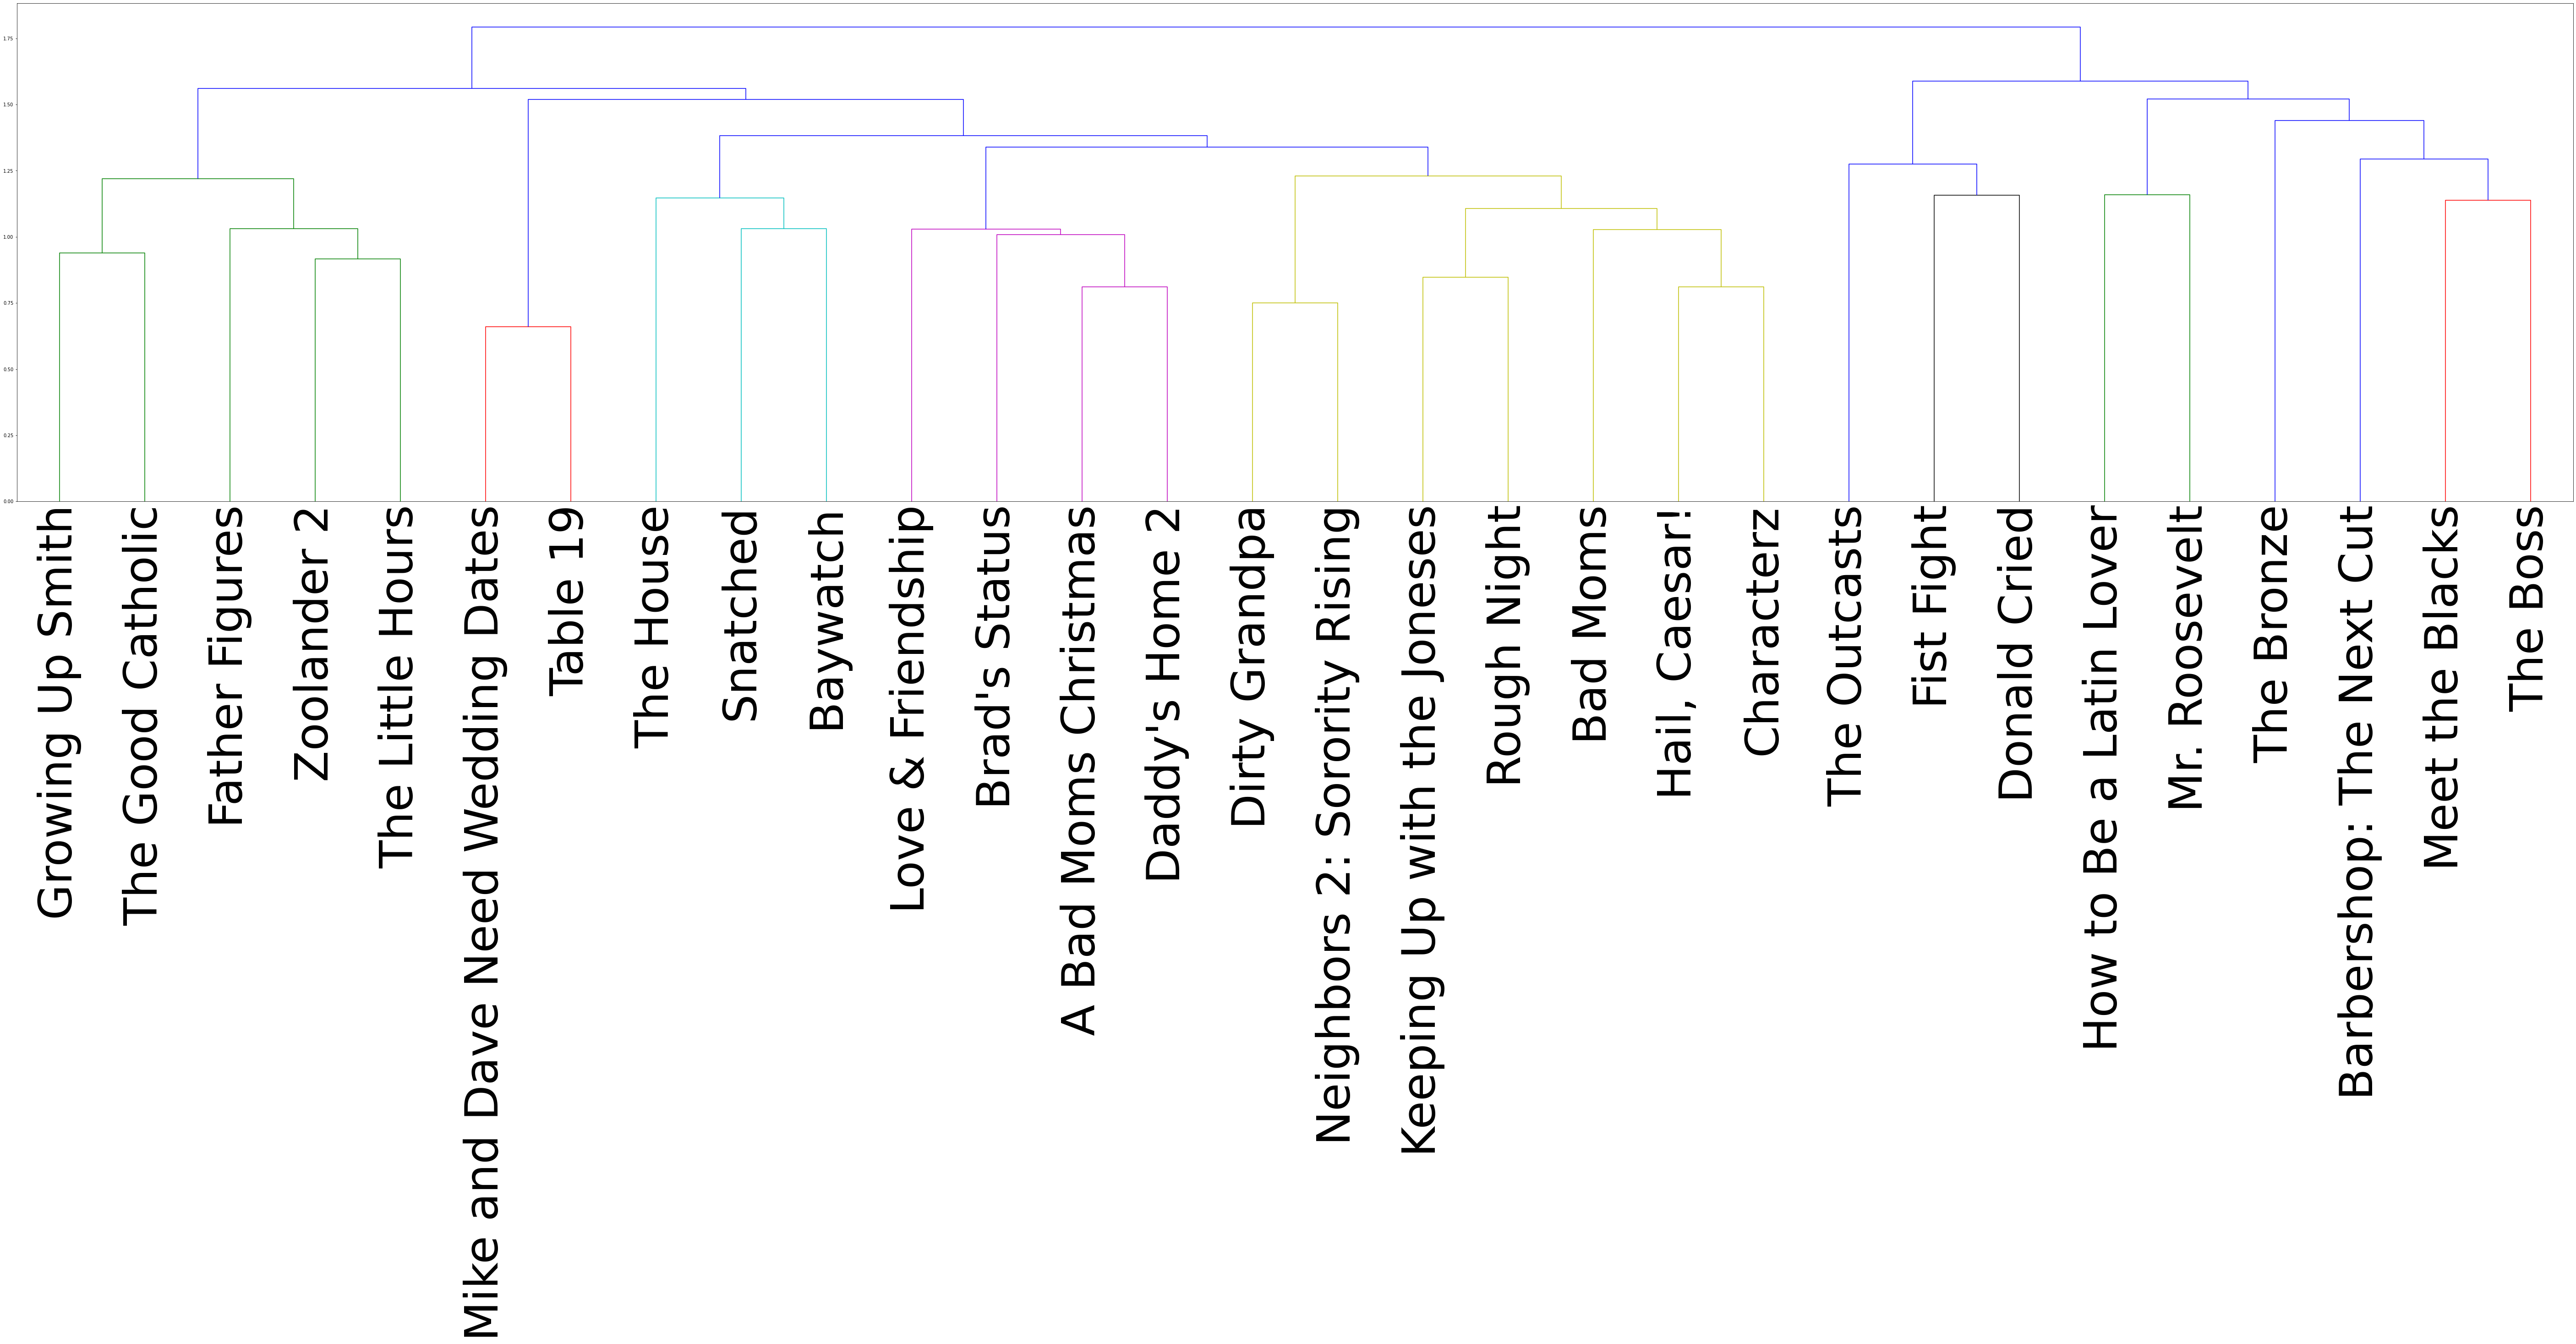

In [9]:
# Use cosine_similarity to calculate similarity (distance) of movie plots

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram 

similarity_distance = 1 - cosine_similarity(tfidf_matrix)
mergings = linkage(similarity_distance, method='complete')

# Plot the dendrogram, using title as label column
dendrogram_ = dendrogram(mergings, labels=[x for x in new_movies["Title"]],
                         leaf_rotation=90, leaf_font_size=100)

fig = plt.gcf()
_ = [lbl.set_color('black') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(100, 20)

plt.show()

### (2). Spectral Clustering

In [10]:
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, SpectralClustering, AffinityPropagation
import seaborn as sns
# Mean Shift for most similar to data points. 
num_clusters = 5
ms = MeanShift()
ms.fit(tfidf_matrix.toarray())

n_clusters_ = len(np.unique(ms.labels_))
print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 1


AxesSubplot(0.125,0.125;0.62x0.755)


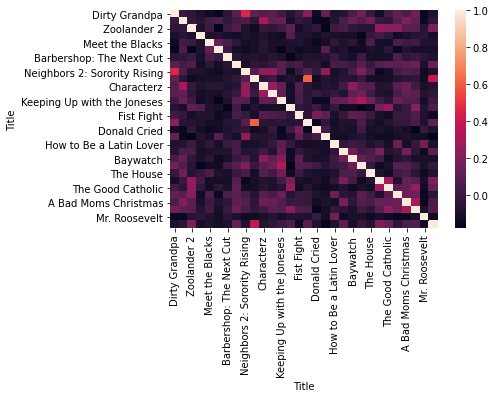

In [11]:
# Spectral Clustering is based on eigenvalues of the similarity matrix
sc = SpectralClustering(n_clusters=5)
sc.fit(tfidf_matrix)
clusters = sc.labels_.tolist()

filenames=new_movies['Title']
sc_df = pd.DataFrame(sc.affinity_matrix_, index=filenames, columns=filenames)
print(sns.heatmap(sc_df.corr()))